<a href="https://colab.research.google.com/github/CakeNuthep/Super_AI/blob/master/22p22c0044_%E0%B8%A8%E0%B8%B8%E0%B8%A0%E0%B8%8A%E0%B8%B1%E0%B8%A2_W3HW1_04102020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.utils import resample, shuffle

In [2]:
df_image = pd.read_csv('https://raw.githubusercontent.com/CakeNuthep/Super_AI/master/super-ai-image-classification/train/train/train.csv')

In [3]:
df_image

,id,category
0,6380fb87-18fe-4b76-a085-639a4e01b664.jpg,0
1,9956035b-0500-47b7-b508-cc7414c10270.jpg,0
2,fa6b4604-a080-410b-a8d1-fdf7cf61a92d.jpg,0
3,6e6dc67b-73ba-404b-b685-1f726d0357c3.jpg,0
4,15121f8e-f428-4cd5-83bf-1c9a051aea54.jpg,0
...,...,...
1720,245a6e32-55b1-47b9-ad43-527b95c9d770.jpg,0
1721,6e8cf04c-6ce1-4971-8978-0d40094378b8.jpg,0
1722,d6a0e4cb-1b83-4867-b9f8-9759a3ba22b0.jpg,0
1723,d6a4760d-c694-4d30-82a5-196f32ddec64.jpg,1


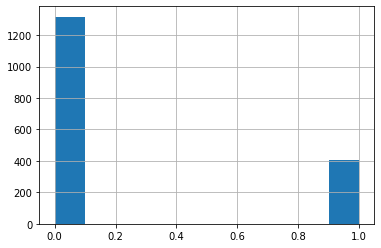

In [4]:
df_image['category'].hist()
plt.show()

In [5]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1725 non-null   object
 1   category  1725 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.1+ KB


In [6]:
df_image.groupby(['category']).agg(['count'])

,id
,count
category,
0,1317
1,408


In [7]:
df_class0 = df_image[df_image['category']==0]
df_class1 = df_image[df_image['category']==1]

df_class1_upsampled = resample(df_class1, 
                                 replace=True,     
                                 n_samples=1317,    
                                 random_state=123) 

In [8]:
df_class1_upsampled

,id,category
1648,ef1db5ea-b4c3-4d60-9f8e-2478ba8be5b1.jpg,1
1686,d3594385-f9b5-4a5c-8785-b03489427c5a.jpg,1
1580,b5f0ca73-eace-4124-a442-f15af925b3f5.jpg,1
1111,2c3efe14-44f0-476d-9086-6af40d89f23f.jpg,1
1402,2cd57caf-9484-4dec-b3c0-f93eb760b935.jpg,1
...,...,...
1439,9380be3e-3fc8-49e6-9d17-f71d9fcabc45.jpg,1
1604,66f4abf1-c977-446f-a202-004556fae60d.jpg,1
1585,9e6f24a8-157c-4018-924a-fa83cf64d332.jpg,1
1572,da54f2b1-4c45-45ec-af22-6e3115ed9b6c.jpg,1


In [9]:
df_upsampled = pd.concat([df_class0, df_class1_upsampled])
df_upsampled

,id,category
0,6380fb87-18fe-4b76-a085-639a4e01b664.jpg,0
1,9956035b-0500-47b7-b508-cc7414c10270.jpg,0
2,fa6b4604-a080-410b-a8d1-fdf7cf61a92d.jpg,0
3,6e6dc67b-73ba-404b-b685-1f726d0357c3.jpg,0
4,15121f8e-f428-4cd5-83bf-1c9a051aea54.jpg,0
...,...,...
1439,9380be3e-3fc8-49e6-9d17-f71d9fcabc45.jpg,1
1604,66f4abf1-c977-446f-a202-004556fae60d.jpg,1
1585,9e6f24a8-157c-4018-924a-fa83cf64d332.jpg,1
1572,da54f2b1-4c45-45ec-af22-6e3115ed9b6c.jpg,1


In [10]:
df_upsampled.groupby(['category']).agg(['count'])

,id
,count
category,
0,1317
1,1317


In [11]:
df_upsampled = shuffle(df_upsampled)

In [12]:
df_upsampled

,id,category
1641,fc4d8a7a-9e97-48ea-83ec-f52680e01e40.jpg,1
527,71dfe0d8-a722-4545-8482-edce70b2b749.jpg,0
858,5a9e525e-6b18-470e-a5a2-f15135db8cb9.jpg,1
320,66eeb06f-b5cd-49b9-8f28-438a599e70e6.jpg,0
894,cc736996-711b-4590-b10a-4f232bb9f4b6.jpg,1
...,...,...
782,ee7bec79-8882-4e5b-86d0-da4738dc607b.jpg,0
1039,f63408f1-99b2-488a-8cae-2c855b8448f2.jpg,0
950,ee0975c9-d462-4a74-b227-2d430e5941b8.jpg,1
529,839841cc-9ca2-4c7b-9c24-a2ced3bdb012.jpg,0


# Train

In [13]:
from sklearn.model_selection import KFold
from keras.applications.resnet50 import ResNet50
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from PIL import Image, ImageOps
import numpy as np
import requests
import io
import PIL
from sklearn.preprocessing import normalize

model = ResNet50(include_top=False, weights='imagenet', classes=1000)

def extract_feature(imgpath):
  if imgpath.find('http')!=-1:
      r = requests.get(imgpath, allow_redirects=True, timeout=10)
      image_bytes = io.BytesIO(r.content)
      img = PIL.Image.open(image_bytes)
  else:
  	  img = image.load_img(imgpath)
  img = ImageOps.fit(img, (224, 224), Image.ANTIALIAS)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x, batch_size=1,verbose=0)
  features = np.ndarray.flatten(features).astype('float64')
  feat = normalize([features])[0]
  return feat

94773248/94765736 [==============================] - 1s 0us/step


In [132]:
featuer = extract_feature('https://github.com/CakeNuthep/Super_AI/blob/master/super-ai-image-classification/train/train/images/00067754-49c2-4de0-b34c-3e0ee8b44ab6.jpg?raw=true')

In [172]:
df_raw = df_upsampled[:]

In [173]:
df_raw

,id,category
1641,fc4d8a7a-9e97-48ea-83ec-f52680e01e40.jpg,1
527,71dfe0d8-a722-4545-8482-edce70b2b749.jpg,0
858,5a9e525e-6b18-470e-a5a2-f15135db8cb9.jpg,1
320,66eeb06f-b5cd-49b9-8f28-438a599e70e6.jpg,0
894,cc736996-711b-4590-b10a-4f232bb9f4b6.jpg,1
...,...,...
782,ee7bec79-8882-4e5b-86d0-da4738dc607b.jpg,0
1039,f63408f1-99b2-488a-8cae-2c855b8448f2.jpg,0
950,ee0975c9-d462-4a74-b227-2d430e5941b8.jpg,1
529,839841cc-9ca2-4c7b-9c24-a2ced3bdb012.jpg,0


In [174]:
feature = []
for index, row in df_raw.iterrows():
  f = extract_feature(f'''https://github.com/CakeNuthep/Super_AI/blob/master/super-ai-image-classification/train/train/images/{row['id']}?raw=true''')
  print(f)
  feature.append(f)
  print(row['id'], row['category'])
df_raw['feature']=feature

Streaming output truncated to the last 5000 lines.
6e85c492-eb57-4c24-97a3-bb00152f0d0f.jpg 1
[0. 0. 0. ... 0. 0. 0.]
6143832e-6d18-4539-8b5c-7ecf0d42e8ec.jpg 0
[0.         0.         0.         ... 0.00038556 0.00075323 0.00065508]
1a244187-677e-47b4-bb7b-4af383353aad.jpg 1
[0. 0. 0. ... 0. 0. 0.]
4b63325f-c2f5-4a84-86d8-508263a21dba.jpg 0
[0.         0.         0.         ... 0.         0.00273045 0.00127492]
7df4491f-1c48-4b47-b657-1f6fbb7d6778.jpg 0
[0. 0. 0. ... 0. 0. 0.]
1b399dba-1554-4096-bae6-e0cc4b1d1f81.jpg 0
[0.         0.         0.         ... 0.00607467 0.         0.00040699]
7bab01c1-ba5a-414a-a817-460f404f8f49.jpg 1
[0. 0. 0. ... 0. 0. 0.]
876f8c81-9c96-46c6-be9d-a6bb6c3c4fc3.jpg 0
[0.         0.         0.         ... 0.         0.         0.01681013]
a61404d1-1c1a-47c1-963c-59b4e5801ff1.jpg 0
[0. 0. 0. ... 0. 0. 0.]
ba747b13-c129-41e2-a411-95d78a664cfb.jpg 1
[0.         0.         0.         ... 0.02091433 0.         0.        ]
13be5cec-bbdb-43da-a50f-6ea08c8bcbee.jp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [175]:
df_raw

,id,category,feature
1641,fc4d8a7a-9e97-48ea-83ec-f52680e01e40.jpg,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
527,71dfe0d8-a722-4545-8482-edce70b2b749.jpg,0,"[0.0, 0.0, 0.0, 0.0005437164238156786, 0.0, 0...."
858,5a9e525e-6b18-470e-a5a2-f15135db8cb9.jpg,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
320,66eeb06f-b5cd-49b9-8f28-438a599e70e6.jpg,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
894,cc736996-711b-4590-b10a-4f232bb9f4b6.jpg,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004731946097..."
...,...,...,...
782,ee7bec79-8882-4e5b-86d0-da4738dc607b.jpg,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1039,f63408f1-99b2-488a-8cae-2c855b8448f2.jpg,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
950,ee0975c9-d462-4a74-b227-2d430e5941b8.jpg,1,"[0.0, 0.0, 0.0, 0.0050324596494092134, 0.0, 0...."
529,839841cc-9ca2-4c7b-9c24-a2ced3bdb012.jpg,0,"[0.0, 0.0, 0.0, 0.0, 0.003985176625863342, 0.0..."


In [176]:
df_raw.to_csv('feature_extaction.csv',index=False)

In [177]:
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
def trainmodel(dataset,num_folds,modfile=''):
  trainfeat, testfeat, trainlabel, testlabel = train_test_split(dataset['feature'], dataset['category'], test_size=0.33, random_state=42)
  #return trainfeat,testfeat,trainlabel,testlabel
  clf = LinearSVC()
  clf = CalibratedClassifierCV() 
  
  
  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=num_folds, shuffle=True)
  fold_no = 1
  for train, test in kfold.split(trainfeat, trainlabel):
    mod = clf.fit(np.vstack(trainfeat.values[train]),np.vstack(trainlabel.values[train]))
    
    res = mod.predict(np.vstack(trainfeat.values[test].ravel()))
    
    acc=0
    acc = sum(res == trainlabel.values[test])/len(res)
    print(f'fold{fold_no} acc:{acc}')
    fold_no = fold_no + 1

  res = mod.predict(np.vstack(testfeat.values.ravel()))  
  acc = sum(res == testlabel.values)/len(res)
  print(f'acc with test data {acc}')
  if modfile!='':
      pickle.dump(mod,open(modfile,'wb'))
  conf = mod.predict_proba(np.vstack(testfeat.values))
  return mod,acc,conf,testlabel

In [190]:
mod,acc,conf,testlabel = trainmodel(df_raw,10,'class_model.mod')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fold1 acc:0.9887005649717514


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fold2 acc:0.9887005649717514


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fold3 acc:0.9717514124293786


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fold4 acc:0.9717514124293786


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fold5 acc:0.9602272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fold6 acc:0.9772727272727273


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fold7 acc:0.9715909090909091


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fold8 acc:0.9431818181818182


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fold9 acc:0.9715909090909091


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fold10 acc:0.9829545454545454
acc with test data 0.9689655172413794


In [191]:
acc

0.9689655172413794

In [192]:
df_compete = pd.read_csv('https://raw.githubusercontent.com/CakeNuthep/Super_AI/master/super-ai-image-classification/val/val/template.csv')

In [194]:
df_compete

,id,category
0,000af6a7-8302-4085-b448-6eae2c1a60e5.jpg,0
1,009b786c-b566-42d6-b62a-c191be65708a.jpg,0
2,01bc0b5f-2701-4670-9edf-6162ed6d65ab.jpg,0
3,04475007-c7de-45c7-8cf0-a8a86f69b9d4.jpg,0
4,0487ece9-58d0-4f56-8360-5f7995b184ca.jpg,0
...,...,...
393,fe7878d2-79de-4191-b6e2-5345316d4e71.jpg,0
394,fe96e4b0-6112-4705-af3c-8f200b3ce929.jpg,0
395,ff18a60d-8522-480f-9270-2d4d9bfc8c07.jpg,0
396,ff45cb7e-0df8-46a5-9f19-0e915e1355c8.jpg,0


In [195]:
df_compete_raw = df_compete[:]

In [196]:
feature_compete = []
for index, row in df_compete_raw.iterrows():
  f = extract_feature(f'''https://raw.githubusercontent.com/CakeNuthep/Super_AI/master/super-ai-image-classification/val/val/images/{row['id']}''')
  print(f)
  feature_compete.append(f)
  print(row['id'], row['category'])
df_compete_raw['feature']=feature_compete

[0. 0. 0. ... 0. 0. 0.]
000af6a7-8302-4085-b448-6eae2c1a60e5.jpg 0
[0. 0. 0. ... 0. 0. 0.]
009b786c-b566-42d6-b62a-c191be65708a.jpg 0
[0.         0.         0.         ... 0.         0.         0.01835951]
01bc0b5f-2701-4670-9edf-6162ed6d65ab.jpg 0
[0.         0.00542353 0.         ... 0.         0.         0.        ]
04475007-c7de-45c7-8cf0-a8a86f69b9d4.jpg 0
[0.         0.         0.         ... 0.02408754 0.         0.        ]
0487ece9-58d0-4f56-8360-5f7995b184ca.jpg 0
[0.         0.00043575 0.         ... 0.         0.         0.00667686]
04c0b6b6-f51a-476f-9dff-cd95f668d8fb.jpg 0
[0.         0.         0.         ... 0.         0.01509768 0.        ]
04dbbf8a-17a9-40e8-9e41-0d28e81ed4f6.jpg 0
[0.         0.         0.         ... 0.         0.01000952 0.        ]
068dd93a-f1d1-4e52-ab7b-77894723c209.jpg 0
[0. 0. 0. ... 0. 0. 0.]
073816f0-5642-48a3-b7a1-05e3df582238.jpg 0
[0.         0.         0.         ... 0.01220066 0.         0.        ]
0757ddf6-51f8-4ac4-a743-cba63db0aefc.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [197]:
arr_result = mod.predict(np.vstack(df_compete_raw['feature']))

In [198]:
df_compete_raw['category']=arr_result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
df_compete_raw

,id,category,feature
0,000af6a7-8302-4085-b448-6eae2c1a60e5.jpg,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0195503977151..."
1,009b786c-b566-42d6-b62a-c191be65708a.jpg,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,01bc0b5f-2701-4670-9edf-6162ed6d65ab.jpg,0,"[0.0, 0.0, 0.0, 0.005146342812650729, 0.0, 0.0..."
3,04475007-c7de-45c7-8cf0-a8a86f69b9d4.jpg,0,"[0.0, 0.005423534490541814, 0.0, 0.00949814976..."
4,0487ece9-58d0-4f56-8360-5f7995b184ca.jpg,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
393,fe7878d2-79de-4191-b6e2-5345316d4e71.jpg,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0021462948895..."
394,fe96e4b0-6112-4705-af3c-8f200b3ce929.jpg,0,"[0.0, 0.0, 0.0, 0.0038975069376543225, 0.0, 0...."
395,ff18a60d-8522-480f-9270-2d4d9bfc8c07.jpg,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
396,ff45cb7e-0df8-46a5-9f19-0e915e1355c8.jpg,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [200]:
#save file result to csv
df_result = df_compete_raw.drop(columns=['feature'],axis=0)

In [201]:
df_result

,id,category
0,000af6a7-8302-4085-b448-6eae2c1a60e5.jpg,0
1,009b786c-b566-42d6-b62a-c191be65708a.jpg,1
2,01bc0b5f-2701-4670-9edf-6162ed6d65ab.jpg,0
3,04475007-c7de-45c7-8cf0-a8a86f69b9d4.jpg,0
4,0487ece9-58d0-4f56-8360-5f7995b184ca.jpg,0
...,...,...
393,fe7878d2-79de-4191-b6e2-5345316d4e71.jpg,0
394,fe96e4b0-6112-4705-af3c-8f200b3ce929.jpg,0
395,ff18a60d-8522-480f-9270-2d4d9bfc8c07.jpg,0
396,ff45cb7e-0df8-46a5-9f19-0e915e1355c8.jpg,0


In [202]:
df_result.to_csv('output_result.csv',index=False)